In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>✌ ¡Hola a todos! Un saludo... Vamos a Empezar ✌ </b></marquee><center>

<table>
    <tr>
        <td><img src="https://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-EIA.jpg" width="250"/></td>
        <td>&nbsp;</td>
        <td>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:50%;color:blue;text-align:center">    <FONT COLOR="blue">  
            Clustering </p> K-means </FONT>         </h1>
        </td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning  </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. No supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

**Objetivo de la sesión**:

En esta sesión revisaremos el método de k-means y lo aplicaremos a la agrupación o clustering.

Inicialmente, daremos los conceptos básicos del método y un ejemplo general. Luego, aplicaremos el método a un caso de estudio.


# <FONT SIZE=5 COLOR="purple"> 1. Algoritmo k-means </FONT>

**Generalidades**

Tomado de [Joaquin](https://rpubs.com/Joaquin_AR/310338) y de [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- La base de $k$-means fue propuesta por *Stuart Lloyd* en 1957 para la modulación por impulsos codificados. Luego evolucionó con la idea de *Hugo Steinhaus*.

- El término $k$-means clustering fue utilizado por primera vez por *MacQueen en 1967*, es uno de los algoritmos de agrupamiento más simples y más utilizados.

- Es uno de los métodos no supervisados que se usa para dividir un conjunto de individuos (registros del Conjunto de Datos) en un conjunto de $k$ grupos (es decir, ***$k$ clusters***), donde $k$ representa el número de grupos preestablecidos. Este algoritmo busca que los objetos ***dentro del mismo cluster*** sean lo más similares posibles (es decir, alta similitud intraclase), mientras que ***distintos clusteres*** sean lo más diferente posible (es decir, baja similitud entre clases).

- En el $k$-means clustering, cada grupo está representado por su centro (es decir, ***centroide***) que corresponde a la media de puntos asignados al ***cluster***.

- $k$-means clustering encuentra los $k$ mejores clústeres, entendiendo como mejor clúster aquel cuya varianza interna (within-cluster variation) sea lo más pequeña posible.

- Se trata por lo tanto de un problema de optimización, en el que se reparten las observaciones en $k$ clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible. Para poder solucionar este problema es necesario definir un modo de cuantificar la varianza interna, que veremos más adelante.

<br>
<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*JsfEdbXKwJw_Euprvx17KA.png?raw=true" alt="centered image" width="500" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://miro.medium.com  </FONT> <figcaption></center>
<br>

**Pasos del Algoritmo de k-means**

1. El primer paso es fijar el número $k$  de clusters que se desean obtener.

2. El algoritmo comienza seleccionando aleatoriamente $k$ puntos del conjunto de datos para que sirvan como centroides iniciales de los cluster.

3. Cada punto del conjunto de datos se asigna al cluster cuyo centroide esté más cercano. Esto se hace usualmente con la distancia euclideana. Es decir, que si $\{\mu_1^{1}, \mu_2^{1}, \dots, \mu_k^{1}\}$ son los centroides iniciale, el punto $x_i$ se asigna al cluster cuyo centroide minimiza

$$ \|x_i-\mu_j^{1} \| \quad 1 \leq j \leq k\}$$

En otras palabras

$$Cluster(x_i) = argmin_j  \|x_i-\mu_j^{1} \|$$

Este proceso se repite para todos lo puntos del conjunto.

Cuando se identifica el centroide más cercano, el punto $x_i$ se asigna al cluster correspondiente a ese centroide.

4. Ahora, vamos a actualizar los centroides. El nuevo centroide se actualiza mediante la media aritmética de los puntos asociados al cluster. Es decir,

$$\mu_i^{2}= \dfrac{1}{|C_{i}^{2}|}\sum \limits_{x_j \in C_i^{2}} x_j$$

y en general,

$$\mu_i^{t+1}= \dfrac{1}{|C_{i}^{t}|}\sum \limits_{x_j \in C_i^{t}} x_j$$

donde $C_i^{t}$ es el cluster $i$ en la iteración $t$ y $|C_{i}^{t}|$ es el número de elementos de ese cluster.

Aca nos preguntamos, ¿cuando debemos parar?

5. En este punto vamos a tratar la función objetivo del algoritmo.

Tenemos que $\{C_1,C_2, \dots, C_k\}$, $k$ conjuntos que contienen las observaciones del conjunto de datos, tales que:

- $C_1 \cup C_2 \cup \dots \cup C_k = {1,2,3, \dots, k}$. Cada observación pertence a uno de los $k$ clusters.

- $C_i \cap C_j = \emptyset $, para $i \neq j$. Es decir, que un registro no puede estar en diferentes clusters.

El objetivo de k-means es consiste en definir grupos de modo que el total de la variación **intra-cluster** sea mínima. A esta cantidad se le conoce como: ***inertia*** o  **within-cluster sum-of-squares** y está definida mediante:

$$WCSS =\sum_{n=1}^{k} W(C_n)= \sum_{n=1}^{k} \sum_{x_i \in C_{n}}||x_i -\mu_n||^2$$

donde,

 - $W(C_k) = \sum_{x_i \in C_{k}}||x_i -\mu_k||^2$

 - $x_i$ es un registro que pertence al cluster $C_k$.

 - $\mu_k$ es el valor promedio de los registros asignados al cluster $C_k$

El algoritmo $k$-means tiene como objetivo elegir ***centroides*** que minimicen la ***inercia***. Esto mide la compacidad del agrupamiento y se quiere que sea lo mas baja posible.

Finalmente, podemos formular el problema mediante:

$$ \min  E(\mu_i)  = \min \sum \limits_{i=1}^{k} \sum \limits_{x_i \in C_n} \|x_i -\mu_n \|^2$$

donde $C$ es el conjunto de datos cuyos elementos son los objetos $x_i$ representados por vectores y cada uno de sus elementos representa una característica o atributo. Tenemos $k$ clusters o grupos con su correspondiente centroide $\mu_n$.

En cada actualización de los centroides, desde el punto de vista matemático, debemos poner una condición necesaria de extremo a la función $E(\mu_i)$

$$\dfrac{\partial E}{\partial \mu_n}=0$$

se puede demostrar que:

$$\mu_i^{(t+1)} = \dfrac{1}{|C_i^{(t)}|} \sum \limits_{x_j \in C_i^{(t)}}x_j$$.





# <FONT SIZE=5 COLOR="purple"> 2. Ejemplo de la idea general </FONT>

Primero, vamos a cargar las librerías.

In [ ]:
# librerías para procesar
import numpy  as np
import pandas as pd

# librerías para graficar
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px

# Algunos elementos de preprocesamiento: escalamiento y selección de k en k-means
from sklearn.preprocessing     import StandardScaler
from sklearn.metrics           import silhouette_samples, silhouette_score

# Para el algoritmo k-means
from sklearn.cluster           import KMeans

# Para otros algoritmos de machine learning
from sklearn.decomposition     import PCA
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.neighbors         import NearestNeighbors
from sklearn.metrics           import pairwise_distances_argmin_min

#Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")

El siguiente código genera un gráfico interactivo que permite mover el número de clusters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interact

# Datos de ejemplo para clustering
np.random.seed(7)
x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)

# Función para actualizar el gráfico de clustering según el valor de n
def actualizar_cluster(n):
    # Crear y ajustar el modelo K-means
    k_means = KMeans(n_clusters=n, random_state=0)
    k_means.fit(X)

    # Obtener centroides y etiquetas
    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_

    # Graficar los clusters
    plt.figure(figsize=(8, 6))
    colores = ['r', 'b', 'g', 'c', 'm', 'y', 'k']  # Diferentes colores para cada cluster
    for i in range(n):
        plt.plot(X[etiquetas == i, 0], X[etiquetas == i, 1], colores[i % len(colores)] + '.', label=f'Cluster {i+1}')

    # Graficar los centroides
    plt.plot(centroides[:, 0], centroides[:, 1], 'mo', markersize=10, label='Centroides')
    plt.title(f'Número de clusters: {n}\nInercia: {round(k_means.inertia_, 2)}')
    plt.legend(loc='best')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

# Crear el control deslizante para el número de clusters
u = interact(actualizar_cluster, n=widgets.IntSlider(value=3, min=1, max=10, step=1, description='Clusters'))


In [ ]:
!pip install imageio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imageio.v2 as imageio
import os

# Crear carpeta para guardar los cuadros del gif
os.makedirs("frames", exist_ok=True)

# Generar datos sintéticos
np.random.seed(7)
x1 = np.random.standard_normal((100, 2)) * 0.6 + np.ones((100, 2))
x2 = np.random.standard_normal((100, 2)) * 0.5 - np.ones((100, 2))
x3 = np.random.standard_normal((100, 2)) * 0.4 - 2 * np.ones((100, 2)) + 5
X = np.concatenate((x1, x2, x3), axis=0)

# Generar imágenes para distintos valores de k
filenames = []
for n in range(1, 8):  # Puedes ajustar el rango si quieres más o menos clusters
    k_means = KMeans(n_clusters=n, random_state=0)
    k_means.fit(X)
    etiquetas = k_means.labels_
    centroides = k_means.cluster_centers_

    plt.figure(figsize=(6, 5))
    colores = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    for i in range(n):
        plt.plot(X[etiquetas == i, 0], X[etiquetas == i, 1], colores[i % len(colores)] + '.', label=f'Cluster {i+1}')
    plt.plot(centroides[:, 0], centroides[:, 1], 'mo', markersize=7, label='Centroides')
    plt.title(f'Clusters: {n} | Inercia: {round(k_means.inertia_, 2)}')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.legend(loc='upper left')
    plt.grid(True)

    filename = f"frames/frame_{n}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Crear el gif animado
with imageio.get_writer("clustering_animado.gif", mode='I', duration=20.0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        for _ in range(40):  # Repetimos cada imagen 5 veces
            writer.append_data(image)

print("✅ GIF creado: clustering_animado.gif")

Vamos a ilustrar como el método selecciona los centroides dependiendo del número del clústers

# <FONT SIZE=5 COLOR="purple"> 3. ¿Cuántos clúster debemos seleccionar? </FONT>


- Determinar el número óptimo de clusters en un conjunto de datos es un problema fundamental en el agrupamiento. En $k$-means se requiere especificar de antemano el número de clusters $k$ que se generarán.

- Desafortunadamente no hay una respuesta definitiva a esta pregunta. El número óptimo de clusters es algo subjetivo y depende del método utilizado para medir
similitudes y los parámetros utilizados para la partición.

Vamos a describir dos métodos para determinar el número óptimo de clusters para $k$-means: ***elbow method*** y ***silhouette***





## <FONT SIZE=4 COLOR="green"> 3.1 El método del codo </FONT>

La idea básica detrás del método $k$-means, es definir el número de clusters que minimizan la inercia ***WCSS***. Recordemos que ***WCSS*** mide la compacidad del agrupamiento y queremos que sea lo más pequeño posible.

El **método codo** analiza el ***WCSS*** como una función del número de clusters. Se debe elegir una cantidad de clusters de tal forma que agregar otro cluster no mejore, en gran medida, el valor ***WCSS***.

El número óptimo de clusters se puede definir de la siguiente manera:

1. Calcule el algoritmo de clustering $k$-means para diferentes valores de $k$. Por ejemplo, puede variar $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule ***WCSS***.

3. Trazar la curva de ***WCSS*** según el número de clusters $k$.

4. La ubicación de una curva (codo) en el plot generalmente se considera como un indicador del número adecuado de clusters.

Tenga en cuenta que el método del codo a veces es ambigüo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters $k$, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clusters son más compactos. El método del codo busca el valor $k$ que satisfaga que un incremento de $k$, no mejore sustancialmente la distancia media intra-cluster.
[ver](https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/)


<center><img src="https://github.com/Fabian830348/cursos/blob/a78eef65f7afa2e9096475bf1860843870f52276/Imagen/elbow.png?raw=true" alt="centered image" width="400" height="250"></center>

El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de clusters a seleccionar para ese conjunto de datos; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de clusters para ese conjunto.

"within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(nuevosACP)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,10)), y=within)
fig.show()


## <FONT SIZE=4 COLOR="green"> 3.2 El método de la Silueta </FONT>

- El coeficiente de silueta mide qué tan bien se agrupa una observación y estima la ***distancia promedio entre clusters***.

- El gráfico de la silueta muestra una medida de qué tan cerca está cada punto en un cluster de los puntos en los clusters vecinos.

Para cada observación $i$, el ancho de la silueta $s_i$ se calcula de la siguiente manera:

1. Para cada observación $i$, calculamos la disimilitud (distancia) promedio $a_i$, entre $i$ y todos los otros puntos del cluster al que pertenezca $i$.

$$a_i = \dfrac{1}{|C_i|-1} \sum \limits_{j \in C_i , i\neq j} d(i,j)$$

esto es, la distancia media entre $i$ y los otros puntos del mismo clúster. *¿Por qué se divide por esa expresión?*

2. Para todos los demás clusters $C$, a los que no pertenezca $i$, calcule el promedio de disimilitud $d(i,C)$ de $i$ con todos los puntos de $C$. La menor de estas $d(i,C)$ se define como $b_i = min_C\  d(i,C)$. El valor de $b_i$ puede verse como la disimilitud promedio entre $i$ y su cluster "vecino", es decir, el más cercano al que ***no*** pertenece.

$$b_i = \min \limits_{k \neq i}\dfrac{1}{|C_k|} \sum \limits_{j \in C_k} d(i,j)$$

3. Finalmente, el ancho de la silueta de la observación $i$ se define mediante la fórmula:

$$S_i = \frac{(b_i - a_i)}{max\{a_i, b_i\}}$$

El ancho de la silueta se puede interpretar de la siguiente manera:

- Primero, este valor está entre $-1$ y $1$.

- Las observaciones con un $S_i$ cercano a 1 están muy bien agrupadas.

- Un $S_i$ pequeño (alrededor de 0) significa que la observación se encuentra entre dos grupos.

- Las observaciones con un $S_i$ negativo probablemente estén ubicadas en el cluster incorrecto.

El algoritmo es similar al método del codo y se puede calcular de la siguiente manera:

1. Calcule el algoritmo $k$-means  para diferentes valores de $k$. Por ejemplo, variando $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule la silueta promedio de las observaciones.

3. Trazar el gráfico según el número de clusters y la silueta promedio.

4. La ubicación del máximo se considera como el número apropiado de clusters.

# <FONT SIZE=5 COLOR="purple"> 4. Ejemplo 1 de k-means (calorías) </FONT>


Vamos a considerar los datos de kaggle

https://www.kaggle.com/code/samtam22/exercise-and-calorie-burning-data-analysis

que contienen las siguientes variables.

- **User_Id** : Identificador único para cada individuo del conjunto de datos.

  - Sirve para vincular diferentes registros del mismo usuario (por ejemplo, de dos datasets: uno de ejercicios y otro de calorías).

- **Gender**: Género del usuario.  En los datos suelen estar codificados como: male = 0, female = 1, o viceversa

- **Age** : Edad del usuario en años.

- **Height**: Estatura del usuario, normalmente expresada en centímetros (cm)

- **Weight** : Peso del usuario en kilogramos (kg).

- **Duration**:  Duración del ejercicio o actividad física, generalmente expresada en minutos

- **Heart_Rate**: Frecuencia cardíaca promedio durante el ejercicio, medida en pulsos por minuto (bpm)

- **Body_Temp**: Temperatura corporal promedio durante la actividad, en grados Celsius (°C)

- **Calories**: Calorías quemadas estimadas durante el ejercicio.

Es la variable objetivo en modelos que predicen gasto energético en base a los factores anteriores

In [4]:
calorias = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/calories.csv")
calorias

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
ejercicio = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/exercise.csv")
ejercicio

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Vamos a fusionar los datos

In [6]:
# pegar los dos dataframes
datos = pd.concat([calorias, ejercicio], axis=1)
datos

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Vamos a eliminar la variable User_ID

In [7]:
# eliminar User_ID
datos = datos.drop('User_ID', axis=1)
datos

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,male,78,193.0,97.0,2.0,84.0,38.3


Hacemos una pequeña exploración de los datos

In [8]:
# cabeza de los datos
datos.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
# tamaño de los datos
datos.shape

(15000, 8)

In [10]:
# variables de los datos
datos.columns

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [11]:
# información de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [12]:
# estadística de los datos
datos.describe()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


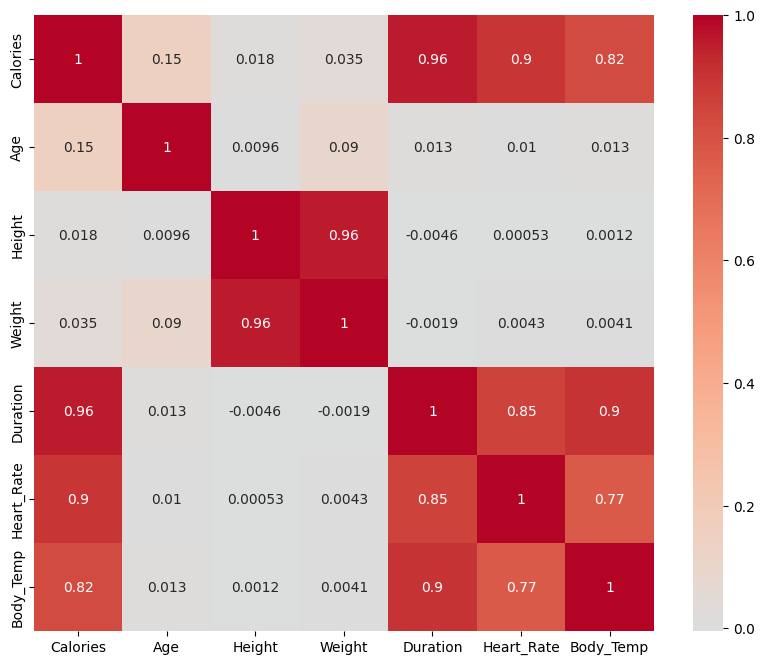

In [13]:
# mapa de correlaciones de las variables numéricas con seaborn
num_cols = datos.select_dtypes(include=["number"])
corr = num_cols.corr()
# Mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,
            xticklabels=num_cols.columns,
            yticklabels=num_cols.columns,
            cmap="coolwarm", center=0)
plt.show()

In [14]:
# gender convertir a 1 y 0
datos.Gender.replace({"male":1, "female":0}, inplace= True)

In [15]:
datos.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8


Escalamos los datos

In [16]:
# Escalamos los datos
scaler = StandardScaler()
scaler.fit(datos)
df = pd.DataFrame(scaler.transform(datos),
                  columns = datos.columns,
                  index = datos.index)
df.head(6)

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,2.265002,1.007092,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023
1,-0.376905,-0.992958,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342
2,-1.017367,1.007092,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035
3,-0.296847,-0.992958,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015
4,-0.873263,-0.992958,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338
5,0.535754,-0.992958,-0.399878,-1.645794,-1.660566,0.897880,0.050242,0.865687


Utilizamos el método del codo para tener una idea de cuántos clusters deberíamos hacer

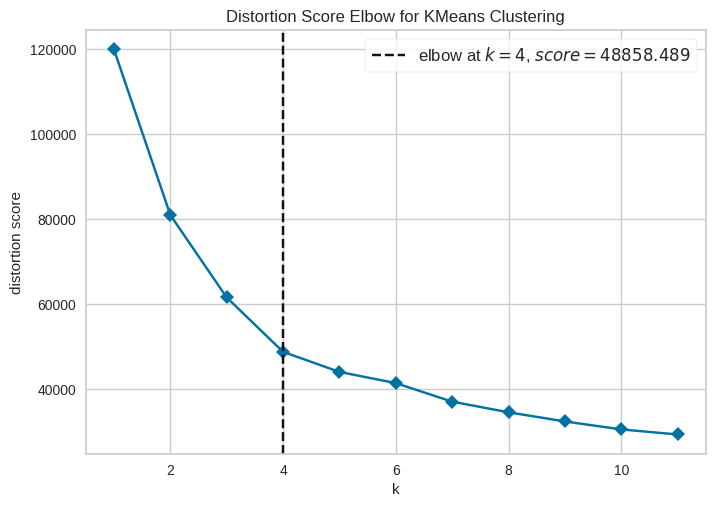

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()                                          # definimos el modelo
visualizer = KElbowVisualizer(model,                      # definimos el visualizador
                              k=(1,12),                   # intervalo de los valores de k
                              timings=False)              # para que no aparezca fit-time
visualizer.fit(df)                                        # Entrenamos con los datos
visualizer.show(show=False)                               # mostramos la gráfica

Hacemos el modelo

In [18]:
# generación del modelo con dos clusters
n = 4
kmeans = KMeans(n_clusters=n,                  #Número de clusters
                random_state=0)                #Semilla aleatoria.
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

Pegamos las etiquetas a los datos para poder analizarlos

In [19]:
# Caso 4 clusters
df_Clusters = datos.copy()
df_Clusters["cluster"] = kmeans.labels_
df_Clusters

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,cluster
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8,3
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3,0
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7,2
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5,1
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8,0
...,...,...,...,...,...,...,...,...,...
14995,45.0,0,20,193.0,86.0,11.0,92.0,40.4,2
14996,23.0,0,27,165.0,65.0,6.0,85.0,39.2,0
14997,75.0,0,43,159.0,58.0,16.0,90.0,40.1,0
14998,11.0,1,78,193.0,97.0,2.0,84.0,38.3,2


In [20]:
# hacer una crosstab de gender y cluster para el conjunto datos
pd.crosstab(df_Clusters.Gender, df_Clusters.cluster)

cluster,0,1,2,3
Gender,,,,
0,3518,3919,56,60
1,70,76,3692,3609


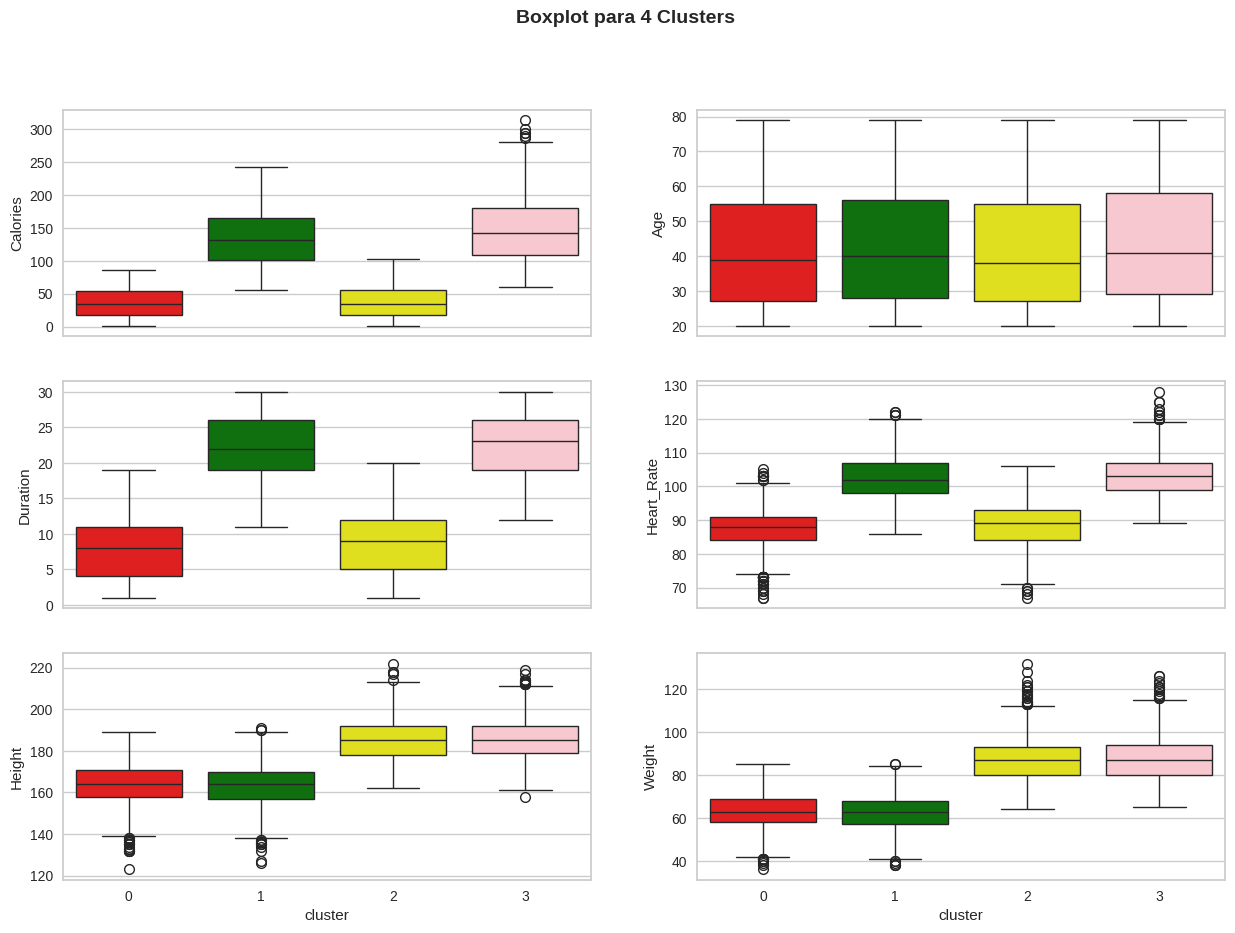

In [21]:
# Box-plots
plt.rcParams["figure.figsize"] = (15,10)
fig, axes = plt.subplots(3, 2 , sharex=True)
my_colors2 ={"0": "red" , "1" : "green" , "2" : "yellow" , "3" : "pink"}
sns.boxplot(data=df_Clusters, x = "cluster", y = "Calories", palette = my_colors2, ax = axes[0,0])
sns.boxplot(data=df_Clusters, x = "cluster", y = "Age", palette = my_colors2, ax = axes[0,1])
sns.boxplot(data=df_Clusters, x = "cluster", y = "Duration", palette = my_colors2,ax = axes[1,0])
sns.boxplot(data=df_Clusters, x = "cluster", y = "Heart_Rate", palette = my_colors2,ax = axes[1,1])
sns.boxplot(data=df_Clusters, x = "cluster", y = "Height", palette = my_colors2,ax = axes[2,0])
sns.boxplot(data=df_Clusters, x = "cluster", y = "Weight", palette = my_colors2,ax = axes[2,1])
fig.suptitle("Boxplot para 4 Clusters", fontsize=14, fontweight="bold",)
plt.show()

In [22]:
sil_scores = {}
for k in range(2, 11):   # probar entre 2 y 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    sil = silhouette_score(df, labels)
    sil_scores[k] = sil
    print(f"k={k}, silhouette={sil:.4f}")

# ---------- Mejor k ----------
best_k = max(sil_scores, key=sil_scores.get)
print("\nMejor número de clusters según silueta:", best_k)

k=2, silhouette=0.2822
k=3, silhouette=0.2827
k=4, silhouette=0.2927
k=5, silhouette=0.2669
k=6, silhouette=0.2392
k=7, silhouette=0.2423
k=8, silhouette=0.2432
k=9, silhouette=0.2389
k=10, silhouette=0.2310

Mejor número de clusters según silueta: 4


In [ ]:
# diagrama de dispersión Age vs Duration color por cluster
px.scatter(df_Clusters,
           x='Calories',
           y='Duration',
           color = "cluster")

In [ ]:
fig = px.scatter_3d(df_Clusters, x='Age', y='Duration', z='Calories', color = "cluster")
fig.show()
fig.write_html("/content/file.html")

# <FONT SIZE=5 COLOR="purple"> 5. Ejemplo de k-means (USArrest)</FONT>

Vamos a importar los siguientes datos que contienen información sobre algunos delitos y el tamaño de la población urbana en estados de USA. El objetivo es buscar agrupar los datos que tal manera que los elementos de los cluster tengan información común que los pueda caracterizar.

## <FONT SIZE=4 COLOR="green"> 5.1 Carga y Exploración </FONT>

In [ ]:
# Traemos los datos de la url.
USArrests = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/USArrests.csv", index_col=0)
USArrests.head()

Primero, hacemos una exploración rápida de los datos

In [ ]:
# tamaño de los datos
USArrests.shape

In [ ]:
# información de datos faltantes
USArrests.info()

No hay datos faltantes. Veamos algunas estadísticas

In [ ]:
# estadísticas de los datos
USArrests.describe()

In [ ]:
import pandas as pd
import plotly.express as px

def boxplots_variables_numericas_plotly(df):
    # Seleccionar solo las columnas numéricas
    df_numerico = df.select_dtypes(include=['number'])

    # Convertir el DataFrame en formato largo para que Plotly pueda graficar
    df_long = df_numerico.melt(var_name='Variable', value_name='Valor')

    # Crear el boxplot con Plotly Express
    fig = px.box(df_long,
                 x='Variable',
                 y='Valor',
                 color='Variable',
                 title='Boxplots de Variables Numéricas')
    fig.update_layout(xaxis_title='Variables', yaxis_title='Valores')
    fig.show()

boxplots_variables_numericas_plotly(USArrests)


Es importante escalar los datos ya que estamos trabajando con distancias entre elementos del conjunto de datos.

In [ ]:
# Escalamos los datos
scaler = StandardScaler()
scaler.fit(USArrests)
df = pd.DataFrame(scaler.transform(USArrests),
                  columns = USArrests.columns,
                  index = USArrests.index)
df.head(6)

## <FONT SIZE=4 COLOR="green"> 5.2 Generación del modelo con $k=2$ </FONT>

Inicialmente, aplicaremos el algoritmo *kmeans* con dos clusters.

In [ ]:
# generación del modelo con dos clusters
n = 2
kmeans = KMeans(n_clusters=n,                  #Número de clusters
                random_state=0)                #Semilla aleatoria.
kmeans.fit(df)

Revisamos los atributos, es decir, la inercia y los centroides de los clústers.

In [ ]:
# Inertia y centroides
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

Los coloco como un DataFrame para visualizarlos mejor

In [ ]:
# Los datos anteriores pero en DataFrame
centroides = pd.DataFrame(kmeans.cluster_centers_, columns = df.columns)
centroides

In [ ]:
# Atributos.
print(kmeans.labels_)

Ponemos está información en el DataFrame con la información del conjunto de datos

In [ ]:
df_cluster = USArrests.copy()
df_cluster["cluster"] = kmeans.labels_
df_cluster.head()

Veamos la media en cada uno de los clusters

In [ ]:
df_cluster.groupby(by = ["cluster"]).mean()

Vamos a realizar la clasificación de un nuevo registro

In [ ]:
X_nuevo = np.array([[13,	250,	47,	20]])
X_nescalado = scaler.transform(X_nuevo.reshape(1, -1))
new_labels = kmeans.predict(X_nescalado)
print(new_labels)

In [ ]:
#veamos el representante del grupo, el usuario cercano a su centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

In [ ]:
users=df.index
for row in closest:
    print(users[row])

Para este ejemplo, como tenemos dos clusters podemos hacer una gráfica de la distancia de cada registro al centro del grupo.

In [ ]:
|


Además, podemos visualizar, hasta en tres dimensiones, como se comportan los clusters.

In [ ]:
fig = px.scatter_3d(df_cluster, x='Assault', y='UrbanPop', z='Murder', color = "cluster")
fig.show()
fig.write_html("/content/file.html")

Analicemos un poco los grupos. Para esto vamos a realizar los diagramas de cajas

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
# Ejemplo de datos (USArrests) y modelo KMeans
df_Clusters2 = USArrests.copy()
df_Clusters2["cluster"] = kmeans.labels_
df_Clusters2["cluster"] = df_Clusters2["cluster"].astype("category")

# Crear subplots de 2x2
fig = make_subplots(rows=2, cols=2, subplot_titles=['Murder', 'Assault', 'UrbanPop', 'Rape'])

# Boxplot para "Murder"
fig1 = px.box(df_Clusters2,
              x='cluster',
              y='Murder',
              color='cluster')
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Boxplot para "Assault"
fig2 = px.box(df_Clusters2,
              x='cluster',
              y='Assault',
              color='cluster')
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Boxplot para "UrbanPop"
fig3 = px.box(df_Clusters2,
              x='cluster',
              y='UrbanPop',
              color='cluster')
for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)

# Boxplot para "Rape"
fig4 = px.box(df_Clusters2,
              x='cluster',
              y='Rape',
              color='cluster')
for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)

# Actualizar layout
fig.update_layout(
    title_text="Boxplots de Variables por Cluster",
    height=1000,
    width=1000,
    showlegend=False
)

fig.show()


También la podemos hacer en seaborn

In [ ]:
## Caso 2 clusters
plt.rcParams["figure.figsize"] = (15,6)
df_Clusters2 = USArrests.copy()
df_Clusters2["cluster"] = kmeans.labels_
df_Clusters2["cluster"] = df_Clusters2["cluster"].astype("category")
## Box-plots
fig, axes = plt.subplots(2,2, sharex=True)
## Gráfica
my_colors = {'0': 'red', '1': 'yellow'}
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Murder", palette = my_colors, ax = axes[0,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Assault",  palette = my_colors,ax = axes[0,1])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "UrbanPop", palette = my_colors, ax = axes[1,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Rape", palette = my_colors, ax = axes[1,1])

plt.show()

***Comentarios:***

1. El cluster 1 tiene una alta tasa delictiva y predomina la población urbana.

2. El cluster 0 tiene tasas bajas de delitos y una menor tasa que el cluster 1 de población urbana.

Note que la solución en este caso es bastante simple, pues solo está teniendo en consideración las tasas de crimenes altos con "población urbana" y tasa de crimenes bajos con "población rural". Esta solución parece ser buena, pues logra identificar los estados que tienen alto y bajo crimen.

## <FONT SIZE=4 COLOR="green"> 5.3 Selección de $k$ </FONT>

Para la selección del número de clústers $k$ usaremos:

- Método del codo
- Método de la silueta.

Para el método del codo podemos hacer la iteración sobre el número de grupos $k$ y generar la inercia $within$ y luego, representar gráficamente.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()                                          # definimos el modelo
visualizer = KElbowVisualizer(model,                      # definimos el visualizador
                              k=(1,12),                   # intervalo de los valores de k
                              timings=False)              # para que no aparezca fit-time
visualizer.fit(df)                                        # Entrenamos con los datos
visualizer.show(show=False)                               # mostramos la gráfica


Según el gráfico anterior podemos usar, por ejemplo, $k=2$ o $k=4$. Sin embargo, el último valor parece más apropiado ya que para los valores siguientes el cambio en la inercia es menor.

Ahora, veamos que nos sugiere el método de la silueta

In [ ]:
# generación de los modelos para diferentes valores de $k$
models = [KMeans(n_clusters=n, random_state=0 ).fit(df) for n in range(2,11)]
silhouette_scores = [silhouette_score(df, model.labels_) for model in models]

# gráficamos los valores de la silueta para cada valor de k
plt.plot(list(range(2, 11)), silhouette_scores, "bo-")
plt.xlabel("Número de clusters $k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Método de la Silueta")
plt.show()

En esta gráfica buscamos los "picos" que representan incrementos del coeficiente de la silueta.

Ahora, vamos a repetir el ejercicio con $k=4$ clusters.

In [ ]:
n = 4                                   # número de clusters
kmeans_4 = KMeans(n_clusters=n,         # Definir el modelo
                random_state=0)         # Semilla aleatoria.
kmeans_4.fit(df)                        # Entrenar el modelo

In [ ]:
# Revisamos los atributos importantes del modelo: inercia y los centroides
print(kmeans_4.inertia_)
print(kmeans_4.cluster_centers_)

Colocaremos la información en un DataFrame y luego haremos las gráficas de los boxplots para hacer el análisis.

In [ ]:
#4 Caso 4 clusters
df_Clusters4 = USArrests.copy()
df_Clusters4["cluster"] = kmeans_4.labels_
df_Clusters4

In [ ]:
# Box-plots
plt.rcParams["figure.figsize"] = (15,8)
fig, axes = plt.subplots(2,2, sharex=True)
my_colors2 ={"0": "red" , "1" : "green" , "2" : "purple" , "3" : "pink"}
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Murder",palette = my_colors2, ax = axes[0,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Assault",palette = my_colors2, ax = axes[0,1])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "UrbanPop", palette = my_colors2,ax = axes[1,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Rape", palette = my_colors2,ax = axes[1,1])
fig.suptitle("Boxplot para 4 Clusters", fontsize=14, fontweight="bold",)
plt.show()

***Comentarios:***


1. El cluster 3 tiene alto el índice de asesinatos. El cluster 2 tiene un menor índice de asesinatos.

2. *Assault* y *Murder*  tiene un comportamiento similar para los clusters.

4. Note que el cluster 1 tiene una tasa más alta de asaltos que el cluster 3. A su vez el cluster 3 tiene más asesinatos. Los clusters 0 y 2 tiene un compartamiento similar en ambas features (*Assault* y *Murder*).

5. En cuanto a *UrbanPop* el cluster 0 y tienen cluster 1 tiene las tasas más altas. Por su supuesto los individuos en los cluster 2 y 3 tiene una tasa baja de población urbana.

Note que podemos caracterizar los cluster así:

- ***Cluster 0:*** Baja tasa de delitos, y una alta tasa de población urbana.

- ***Cluster 1.*** Alta tasa en todas las features.

- ***Cluster 2.*** Baja tasa en todas las features.

- ***Cluster 3.*** Alta tasa de `Murder` y `Assault` con baja tasa de población urbana y violaciones.

Esta solución parece ser buena, en este caso podemos pensar en una segmentación basados en la feature *UrbanPop*, note que acá tenemos más información que con 2 clusters.

# <FONT SIZE=5 COLOR="purple"> 6. Ejemplo 3 de k-means (digits) </FONT>

Vamos a revisar el siguiente conjunto de dígitos

In [ ]:
from sklearn.datasets import load_digits
from PIL import Image

In [ ]:
digits = load_digits()
data = digits.data

Vamos un elemento de este conjunto

In [ ]:
data[1]

Observe que son los valores de colores en escalas de grises. Podemos cambiar la escala

In [ ]:
data = 255-data

In [ ]:
data[1]

Veamos el elemento gráfico

In [ ]:
imagen = data[1, ]
imagen = imagen.reshape(8, 8)
plt.imshow(imagen, cmap=plt.cm.gray)

Veamos más elementos

In [ ]:
plt.figure(figsize=(10,10))
for k in range(0, 100):
  plt.subplot(19, 10, k+1)
  imagen = data[k, ]
  imagen = imagen.reshape(8, 8)
  plt.imshow(imagen, cmap=plt.cm.gray)
  plt.axis('off')
plt.show()

In [ ]:
print(data.shape)

El objetivo del ejercicio es utilizar *k-means* para agrupar los dígitos.

In [ ]:
# fijamos una semilla
np.random.seed(1)

# Generamos el modelo
kmeans = KMeans(n_clusters=10,
                init='random')
kmeans.fit(data)
predict = kmeans.predict(data)

In [ ]:
# elementos donde se cumple que el clúster es 1
fila = np.where(predict==1)[0]
fila

In [ ]:
# número de imágenes que clasificó en el clúster 1
num = fila.shape[0]
num

In [ ]:
for i in range(0,10):

    fila = np.where(predict==i)[0]   # filas en predict donde están las imágenes de cada cluster
    num = fila.shape[0]              # número imagenes de cada cluster
    r = np.floor(num/10.)            # número de filas menos 1 en figura de salida

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(int(r+1), 10, k+1)
        imagen = data[fila[k], ]
        imagen = imagen.reshape(8, 8)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>Muchas gracias por asistir a la clase</b></marquee><center>

# <FONT SIZE=5 COLOR="purple">  7. Ejemplo 2. Aplicado PCA + K-means </FONT>

Consideremos el conjunto de datos clásico de mnist de la librería keras. Este conjunto se usa mucho para redes neuronales y en internet hay muchos ejemplos con este conjunto.

Vamos a importar las librerías

In [23]:
# importamos keras para el conjunto de datos
import keras
from keras.datasets import fashion_mnist
# importamos kmeans
from sklearn.cluster import KMeans

El conjunto de datos que vamos a usar, viene distribuido en dos partes ya que nos sirve para problemas de clasificación.

In [24]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


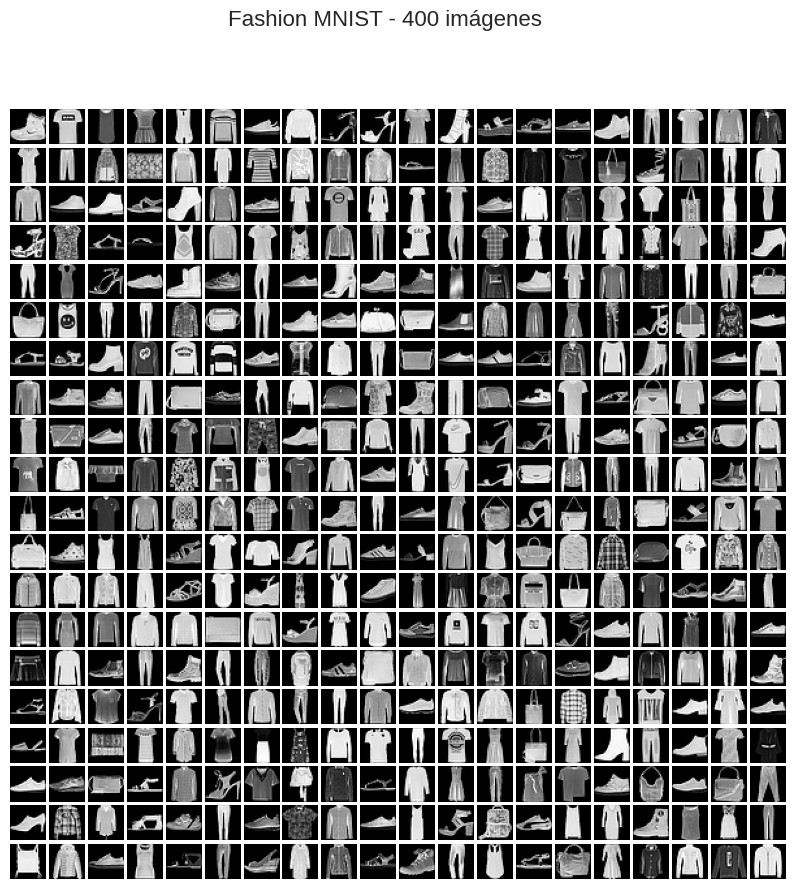

In [25]:
# Seleccionar 400 imágenes (puedes hacer shuffle si quieres aleatoriedad)
n_images = 400
images = X_train[:n_images]

# Crear figura y ejes
fig, axes = plt.subplots(20, 20, figsize=(10, 10))

# Eliminar espacios entre celdas
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Rellenar la cuadrícula
for i in range(20):
    for j in range(20):
        idx = i * 20 + j
        axes[i, j].imshow(images[idx], cmap='gray')
        axes[i, j].axis('off')  # Ocultar ejes

plt.suptitle("Fashion MNIST - 400 imágenes", fontsize=16)
plt.show()

In [26]:
X_train.shape

(60000, 28, 28)

Para el propósito de este ejercicio solamente vamos a tomar el conjunto de entrenamiento.


In [27]:
# debemos redimensionar los datos. como es 28 x 28 = 784
imagenes = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
imagenes.shape

(60000, 784)

In [28]:
# llamaremos y a los labels
y = y_train
y.shape

(60000,)

La variable y está dada de forma numérica, pero en realidad es una codificación de lo siguiente:

0 --->  Tshirt

1 --->  Trouser

2 --->  Pullover

3 --->  Dress

4 --->  Coat

5 --->  Sandal

6 --->  Shirt

7 --->  Sneaker

8 --->  Bag

9 --->  Ankle Boot

Visualicemos algunos elementos

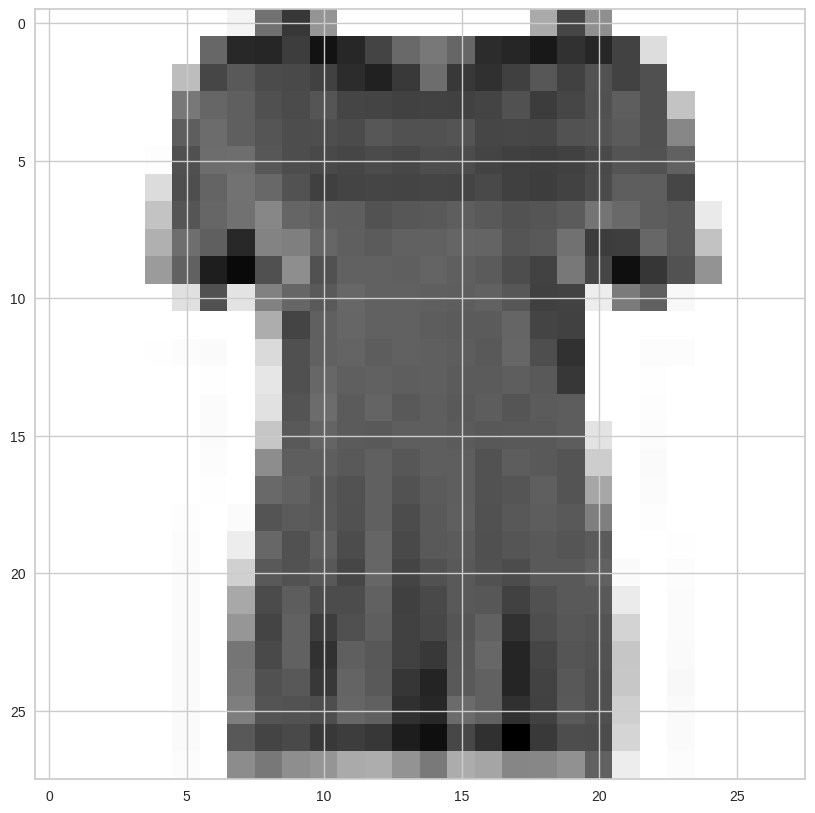

np.uint8(0)

In [29]:
# podemos cambiar el número n
n= 10
plt.imshow(imagenes[n].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary)
plt.show()
y[n]

La idea del ejercicio es reducir la dimensionalidad para luego aplicar k-means y hacer el proceso de clustering

## <FONT SIZE=5 COLOR="purple">  4.1 Aplicar PCA </FONT>

In [30]:
# primero debeos escalar los datos
imagenes_est = StandardScaler().fit_transform(imagenes)

In [31]:
from sklearn.decomposition import PCA
#vamos a definir la varianza que queremos acumular
varianza = 0.98
pca = PCA(varianza)

In [32]:
#entreno el PCA
pca.fit(imagenes_est)

PCA(n_components=0.98)

Veamos el número de componentes

In [33]:
pca.n_components_

np.int64(420)

Ahora, vamos a transformar nuestros datos

In [34]:
#Transformar los datos de acuerdo con el PCA definido
imagenes_pca = pca.transform(imagenes_est)

In [35]:
# dimensión después del PCA
imagenes_pca.shape

(60000, 420)

In [36]:
#Vamos a definir la transformada inversa para poder visualizar los elementos a partir de la transformación
approx = pca.inverse_transform(imagenes_pca)
approx.shape

(60000, 784)

Vamos a reconstruir las imágenes usando menos información

8


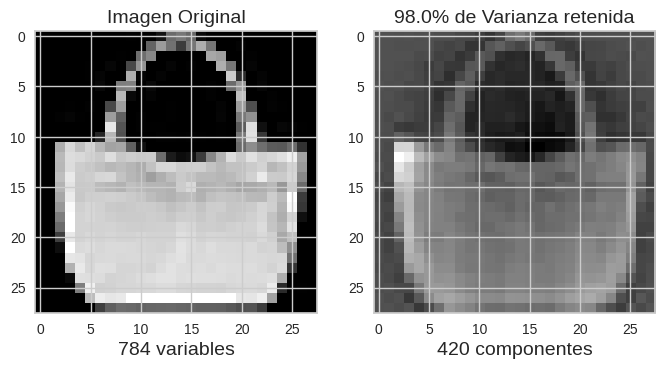

In [37]:
#Reconstrucción de las imágenes con menos información
plt.figure(figsize=(8,4));

# un valor de n para el objeto del dataframe
n = 100

# Imagen Original
plt.subplot(1, 2, 1);
plt.imshow(imagenes[n].reshape(X_train.shape[1],X_train.shape[2]), # basicamente X_train.shape[1] = 28
           cmap = plt.cm.gray,);
plt.xlabel(str(imagenes.shape[1])+" variables", fontsize = 14)
plt.title("Imagen Original", fontsize = 14);

# Imagen con las componentes
plt.subplot(1, 2, 2);
plt.imshow(approx[n].reshape(X_train.shape[1], X_train.shape[2]),
           cmap = plt.cm.gray,);
plt.xlabel(str(imagenes_pca.shape[1]) +" componentes", fontsize = 14)
plt.title(str(varianza * 100) + '% de Varianza retenida', fontsize = 14);

print(y_train[n])

## <FONT SIZE=5 COLOR="purple">  4.2 Aplicar K-means </FONT>

In [38]:
k_means = KMeans(init = "k-means++",
                 n_clusters = 10,
                 n_init = 35)

**init="k-means++"**

- Utiliza el algoritmo KMeans++ para elegir los centroides iniciales de forma inteligente.

- Mejora la estabilidad del algoritmo y reduce el riesgo de caer en un mal mínimo local.

Es mejor que usar centroides aleatorios (init="random").

**n_clusters=10**

- Es el número de grupos y tomaremos 10 por las clases que hay en el conjunto.

**n_init=35**

- Significa que el algoritmo KMeans se ejecutará 35 veces con diferentes centroides iniciales.

- Luego elegirá la mejor solución (la que tenga el menor error de agrupamiento, o inercia).

- Más repeticiones = más probabilidades de encontrar una buena solución.

In [39]:
#vamos a entrenar el modelo de kmeans para nuestros datos_pca
k_means.fit(imagenes_pca)

KMeans(n_clusters=10, n_init=35)

In [40]:
# recomendación -- guardar el modelo
import joblib
# guardar
joblib.dump(k_means, 'kmeans_model.joblib')
# cargar
#k_means = joblib.load('kmeans_model.joblib')

['kmeans_model.joblib']

In [41]:
# verificamos los labels o etiquetas
k_means_labels = k_means.labels_
print("La lista de los labels de los clusters son " + str(np.unique(k_means_labels)))

La lista de los labels de los clusters son [0 1 2 3 4 5 6 7 8 9]


In [42]:
# número de labels
num_lab = len(np.unique(k_means_labels))

#Veamos los elementos que pertenecen a cada label o etiqueta
cluster_index= [[] for i in range(num_lab)]
for i, label in enumerate(k_means_labels,0):
    for n in range(num_lab):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue

In [43]:
# veamos los primeros 10 indices algunos label
print("registros del label 0", cluster_index[0][0:10])
print("registros del label 1", cluster_index[1][0:10])
print("registros del label 2", cluster_index[2][0:10])

registros del label 0 [99, 100, 117, 156, 212, 214, 220, 233, 246, 254]
registros del label 1 [1, 10, 17, 20, 25, 26, 47, 48, 49, 55]
registros del label 2 [2, 8, 9, 13, 19, 30, 33, 34, 62, 63]


Ahora, vamos a visualizar algunos clusters

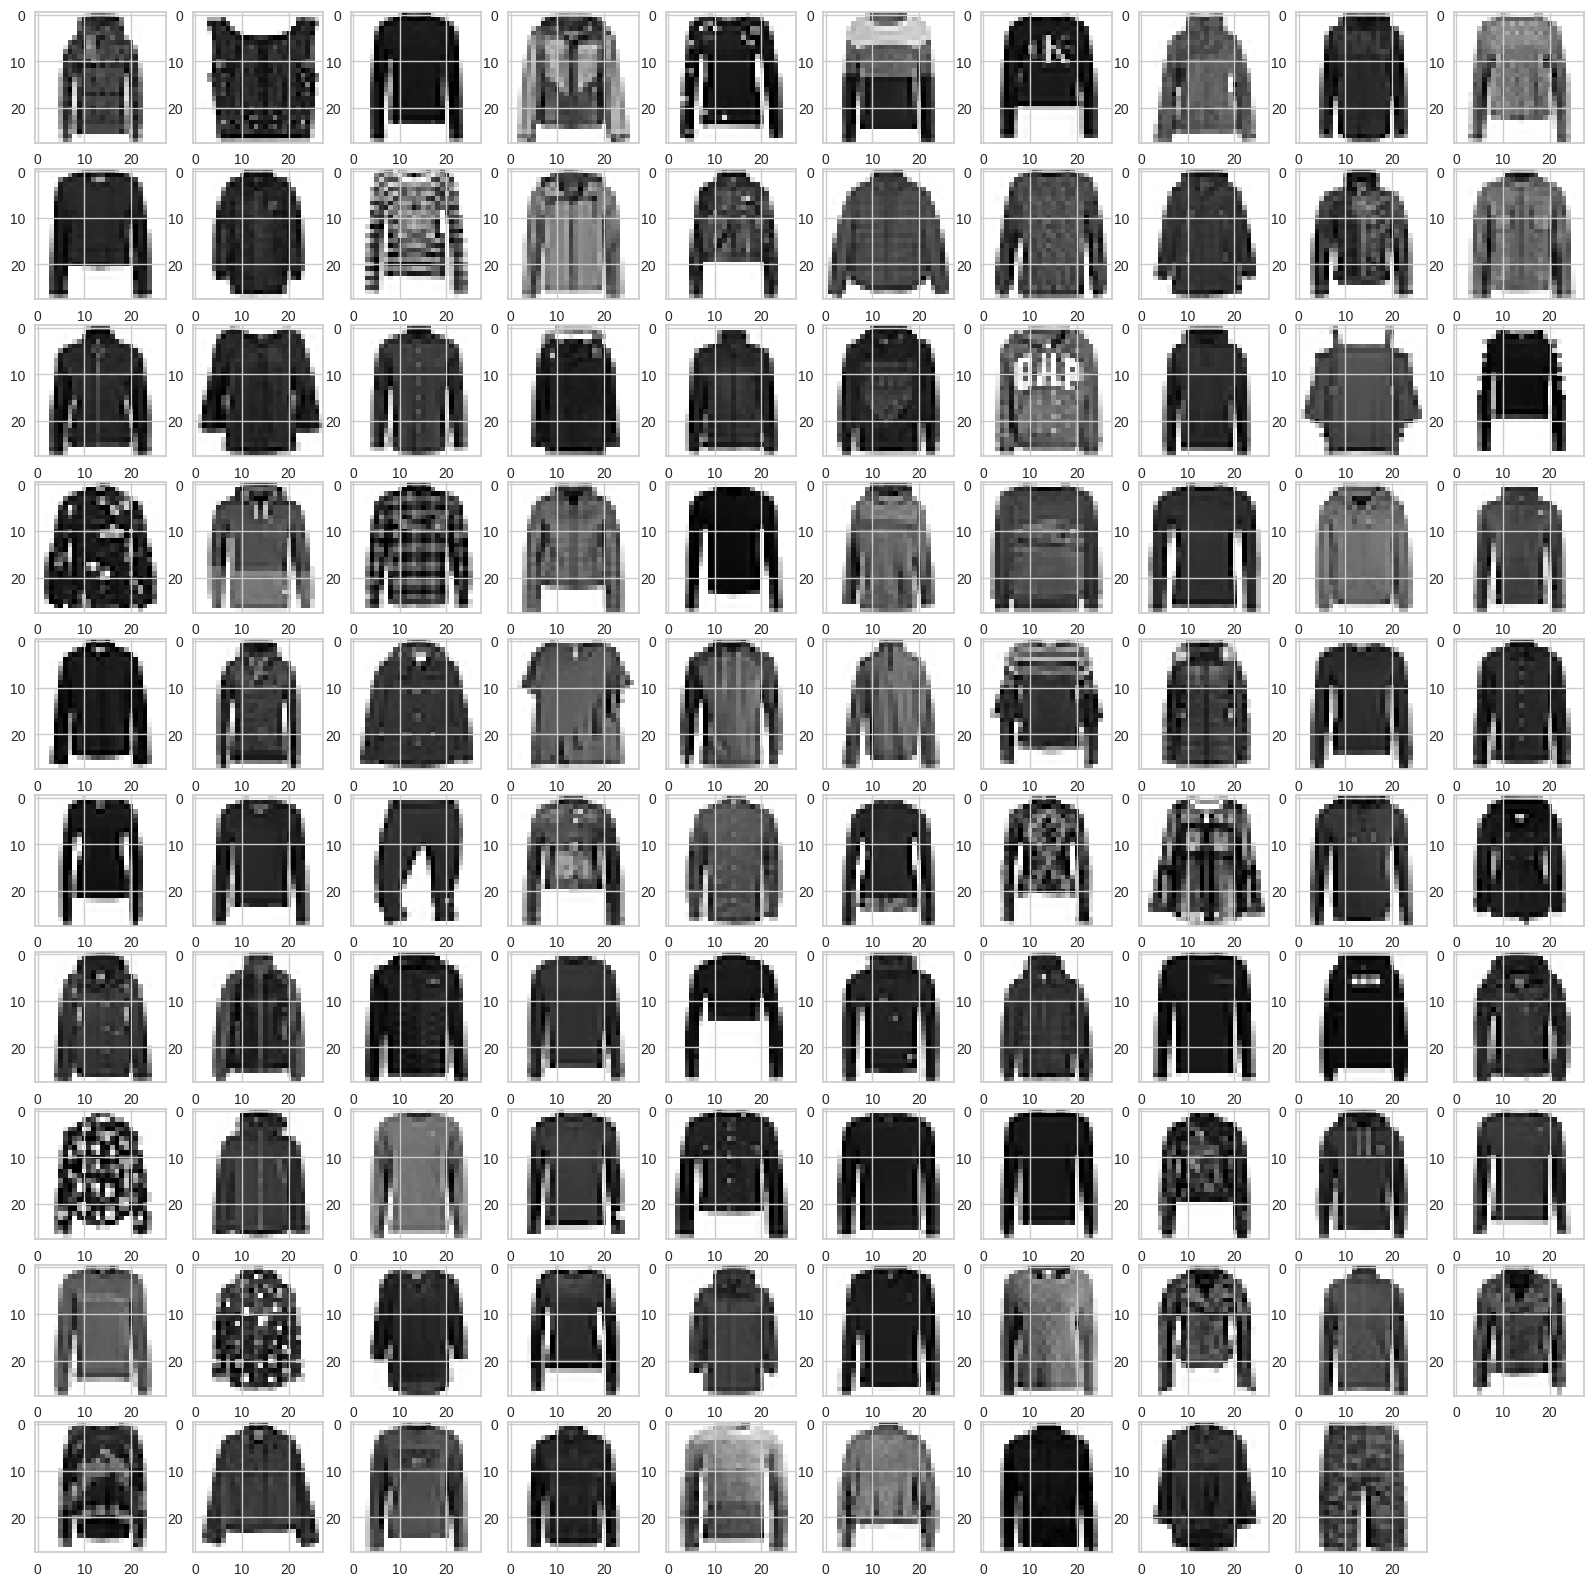

In [47]:
#Visualización de algunos clusters
# establecemos el tamaño de la figura
plt.figure(figsize=(20,20));
# definimos el número de cluster que queremos visualizar
clust = 8
# definimos el número de elementos a visualizar
num = 100
for i in range(1,num):
    # número de filas, número de columnas por filas, iterador
    plt.subplot(10, 10, i);
    plt.imshow(imagenes[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);

plt.show()